In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dir_path = "/Users/skodate/Downloads/flight_delays/flight_data"

df_airlines = pd.read_csv(os.path.join(dir_path, 'airlines.csv'))
df_airports = pd.read_csv(os.path.join(dir_path, 'airports.csv'))
df_flights = pd.read_csv(os.path.join(dir_path, 'flights.csv'), low_memory=False)

In [3]:
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_flights.shape


(5819079, 31)

In [7]:
# df_flights.dropna(inplace=True)

In [8]:
# df_flights.shape
df_flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

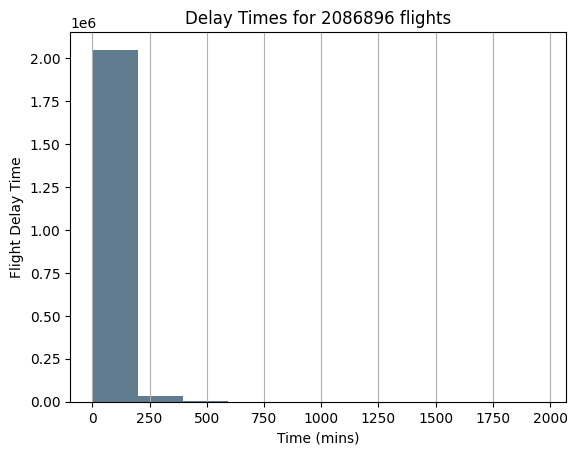

In [9]:
def hist_delay(s_delays):
    # size, scale = 1000, 10
    # commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

    s_delays.plot.hist(grid=True,
                       color='#607c8e')
    plt.title(f'Delay Times for {len(s_delays)} flights')
    plt.xlabel('Time (mins)')
    plt.ylabel('Flight Delay Time')
    plt.grid(axis='y')
    
cond_gt0 = df_flights['ARRIVAL_DELAY'] >0
    
hist_delay(df_flights.loc[cond_gt0, 'ARRIVAL_DELAY'])

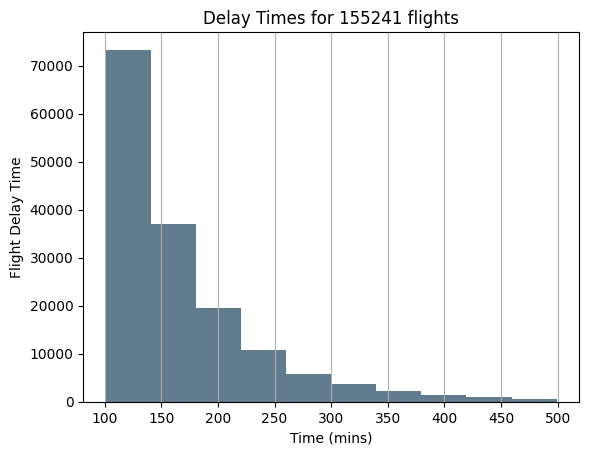

In [10]:

cond_gt100 = df_flights['ARRIVAL_DELAY'] >100
cond_lt500 = df_flights['ARRIVAL_DELAY'] <500
    
hist_delay(df_flights.loc[cond_gt100 & cond_lt500, 'ARRIVAL_DELAY'])

1971.0


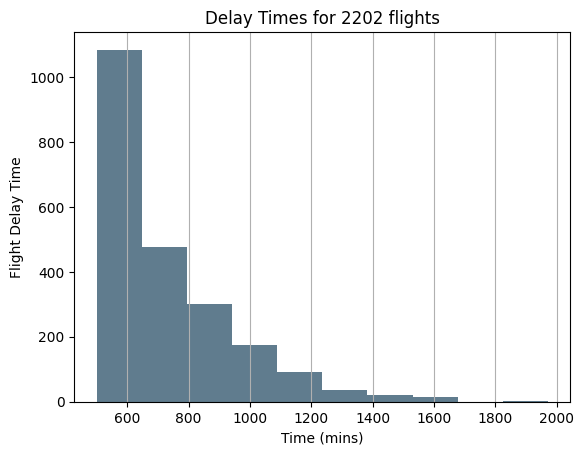

In [11]:
cond_gt100 = df_flights['ARRIVAL_DELAY'] >500
cond_lt500 = df_flights['ARRIVAL_DELAY'] <2000
print(max(df_flights.loc[cond_gt100 & cond_lt500, 'ARRIVAL_DELAY']))
   
hist_delay(df_flights.loc[cond_gt100 & cond_lt500, 'ARRIVAL_DELAY'])

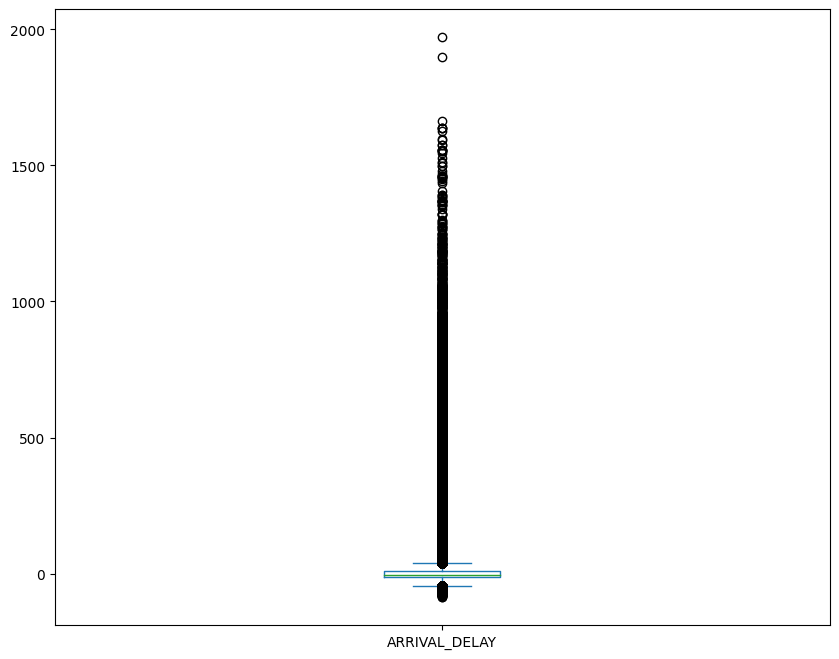

In [12]:
ax = df_flights.plot.box(column="ARRIVAL_DELAY", figsize=(10, 8))

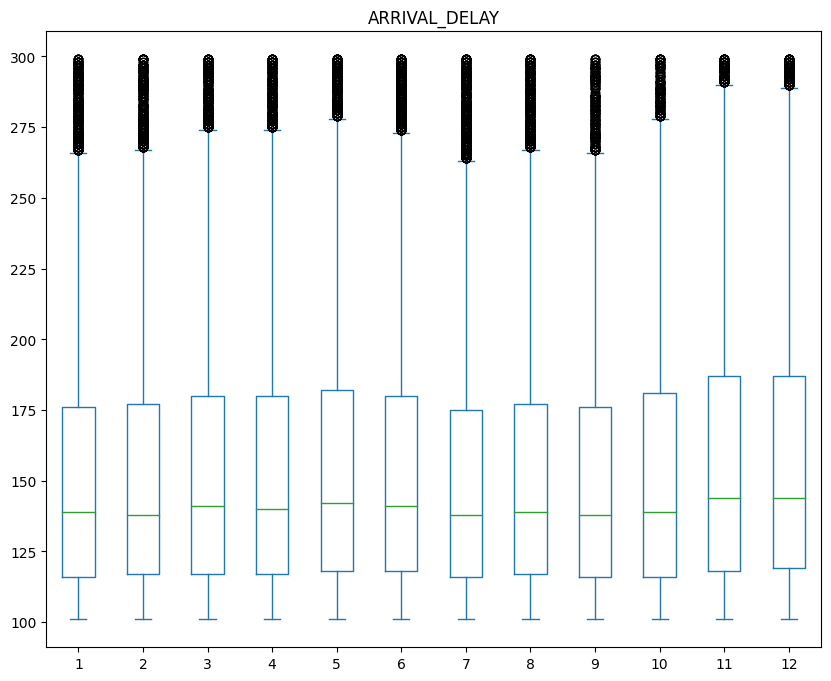

In [13]:

cond_gt100 = df_flights['ARRIVAL_DELAY'] >100
cond_lt500 = df_flights['ARRIVAL_DELAY'] <300
    
df_temp = df_flights.loc[cond_gt100 & cond_lt500]


ax = df_temp.plot.box(column="ARRIVAL_DELAY", by="MONTH", figsize=(10, 8))

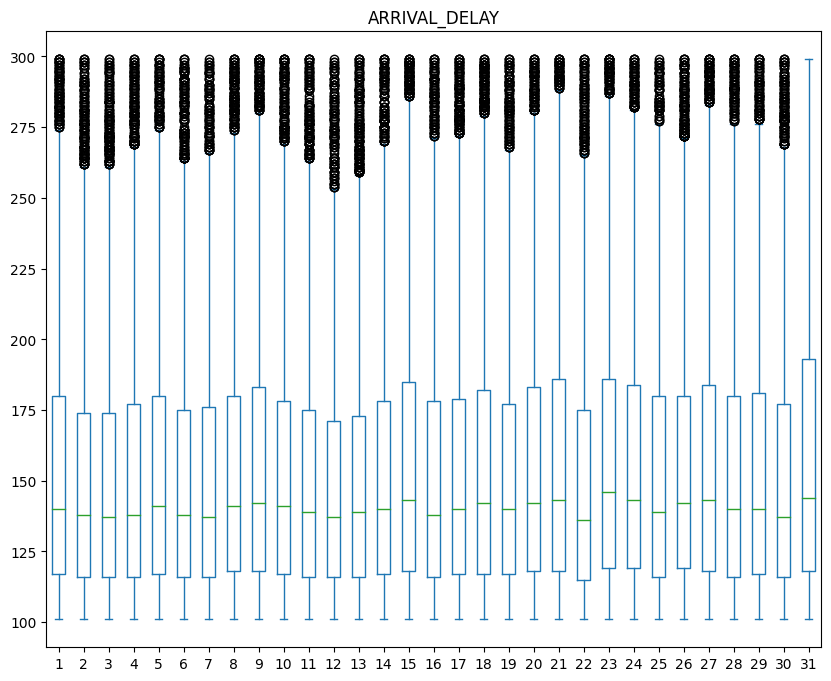

In [14]:
cond_gt100 = df_flights['ARRIVAL_DELAY'] >100
cond_lt500 = df_flights['ARRIVAL_DELAY'] <300
    
df_temp = df_flights.loc[cond_gt100 & cond_lt500]


ax = df_temp.plot.box(column="ARRIVAL_DELAY", by="DAY", figsize=(10, 8))

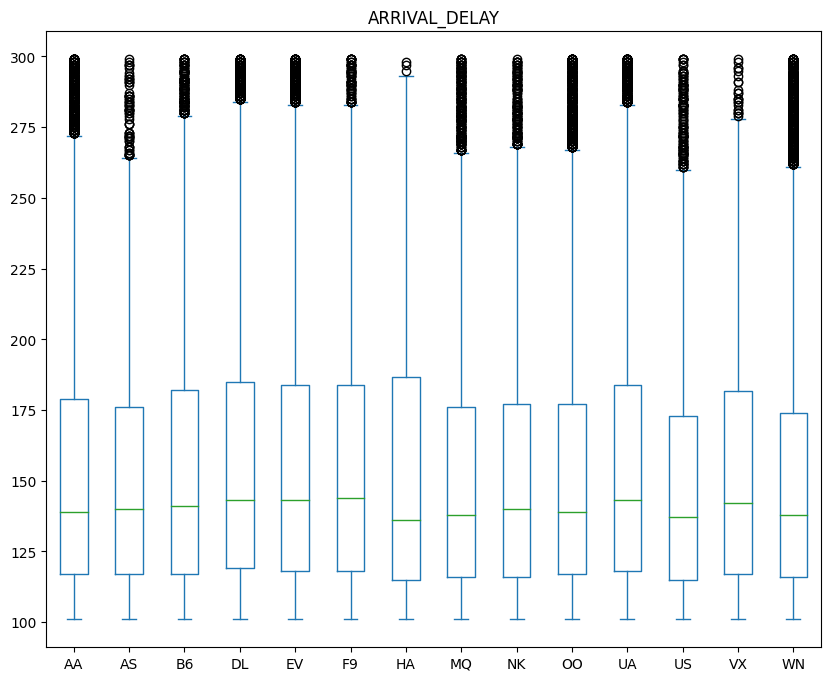

In [15]:
cond_gt100 = df_flights['ARRIVAL_DELAY'] >100
cond_lt500 = df_flights['ARRIVAL_DELAY'] <300
    
df_temp = df_flights.loc[cond_gt100 & cond_lt500]


ax = df_temp.plot.box(column="ARRIVAL_DELAY", by="AIRLINE", figsize=(10, 8))

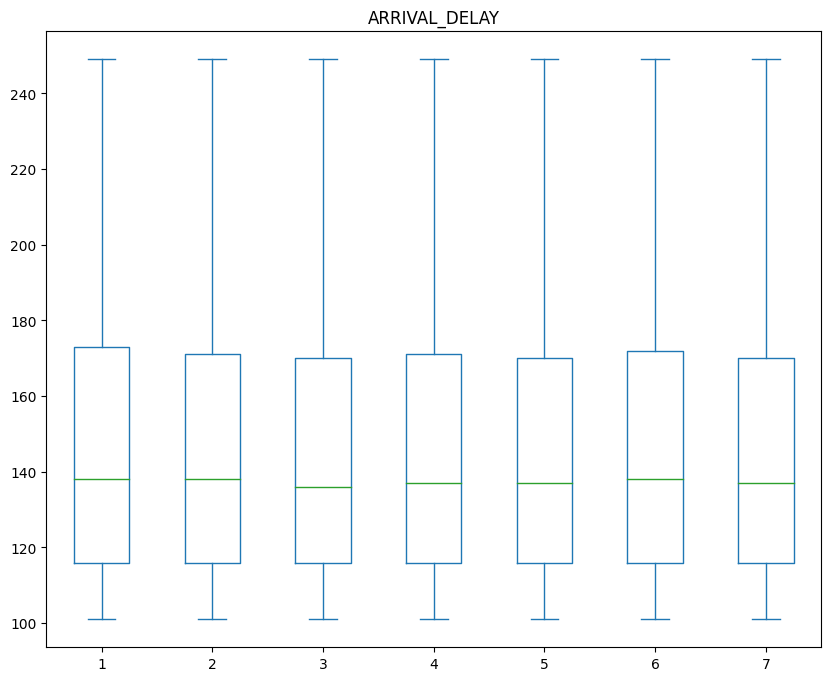

In [25]:
cond_gt100 = df_flights['ARRIVAL_DELAY'] >100
cond_lt500 = df_flights['ARRIVAL_DELAY'] <250
    
df_temp = df_flights.loc[cond_gt100 & cond_lt500]


ax = df_temp.plot.box(column="ARRIVAL_DELAY", by="DAY_OF_WEEK", figsize=(10, 8))

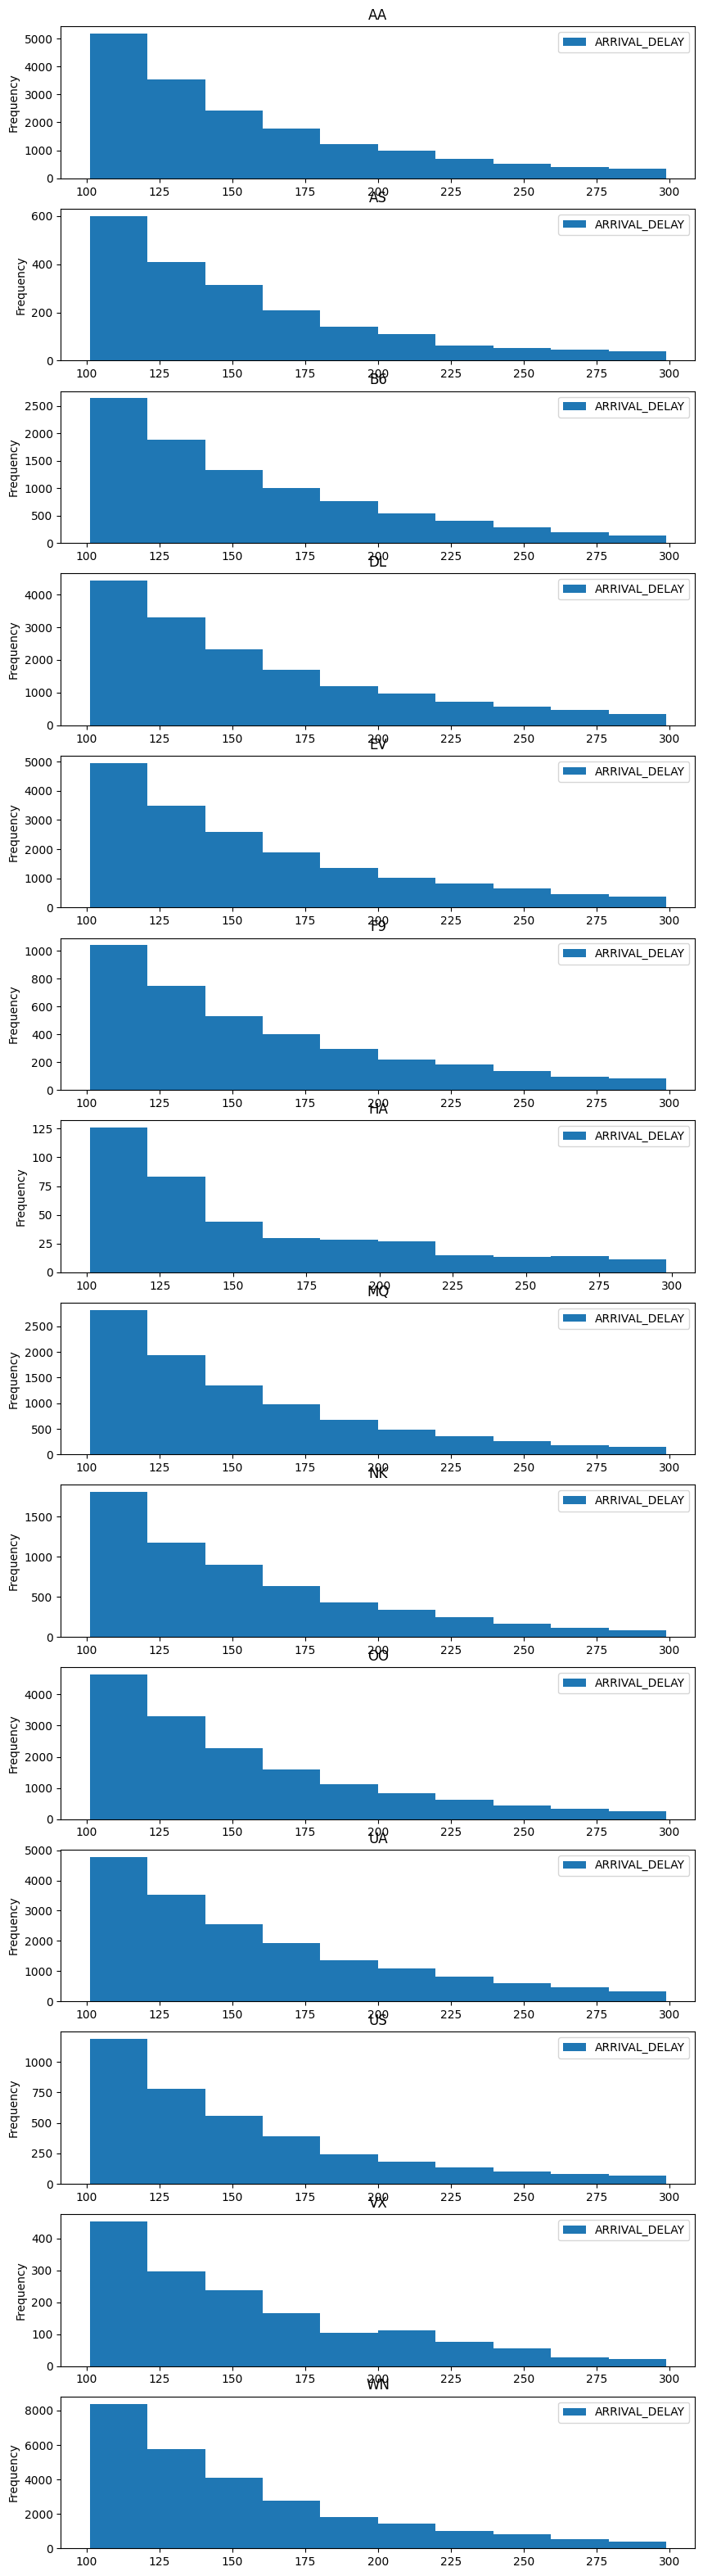

In [22]:
cond_gt100 = df_flights['ARRIVAL_DELAY'] >100
cond_lt500 = df_flights['ARRIVAL_DELAY'] <300
    
df_temp = df_flights.loc[cond_gt100 & cond_lt500]


ax = df_temp.plot.hist(column=["ARRIVAL_DELAY"], by="AIRLINE", figsize=(10, 40))

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


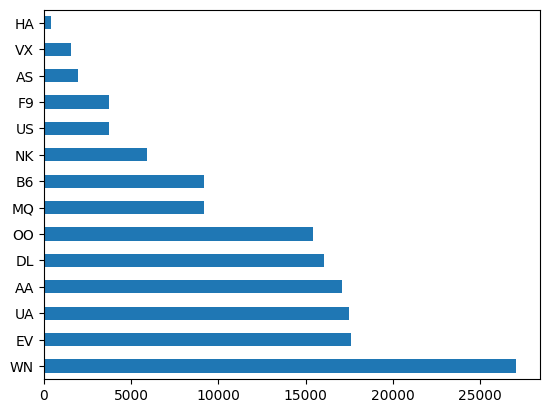

In [27]:
cond_gt100 = df_flights['ARRIVAL_DELAY'] >100
cond_lt500 = df_flights['ARRIVAL_DELAY'] <300
    
df_temp = df_flights.loc[cond_gt100 & cond_lt500]

ax = df_temp["AIRLINE"].value_counts().plot(kind='barh')
# ax.set_xscale('log')
display(df_airlines)

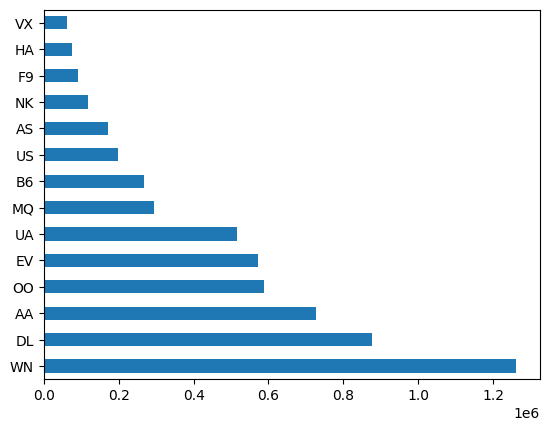

In [29]:


ax = df_flights["AIRLINE"].value_counts().plot(kind='barh')
# ax.set_xscale('log')
# display(df_airlines)

,AIRLINE,DELAYS,NON_DELAYS,TOTAL,PERC_DELAYS,PERC_NON_DELAYS
0,"(UA, United Air Lines Inc.)",186227,321535,507762,36.68,63.32
1,"(AA, American Airlines Inc.)",252191,460744,712935,35.37,64.63
2,"(US, US Airways Inc.)",76285,117938,194223,39.28,60.72
3,"(F9, Frontier Airlines Inc.)",41232,48858,90090,45.77,54.23
4,"(B6, JetBlue Airways)",101998,160044,262042,38.92,61.08
5,"(OO, Skywest Airlines Inc.)",222435,354379,576814,38.56,61.44
6,"(AS, Alaska Airlines Inc.)",56953,114486,171439,33.22,66.78
7,"(NK, Spirit Air Lines)",56887,58306,115193,49.38,50.62
8,"(WN, Southwest Airlines Co.)",470767,771636,1242403,37.89,62.11
9,"(DL, Delta Air Lines Inc.)",250840,619435,870275,28.82,71.18


<AxesSubplot: ylabel='AIRLINE'>

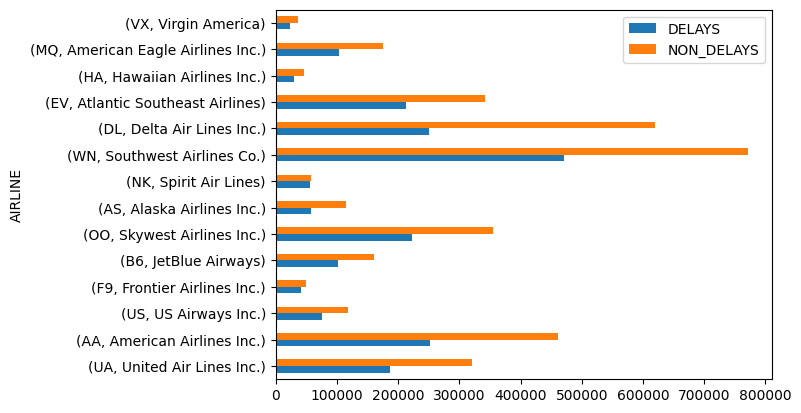

In [52]:
list_air = zip(list(df_airlines['IATA_CODE']), list(df_airlines['AIRLINE']))
list_air
def percentage(df_data):
    list_records = []
    
    cond_gt0 = df_data['ARRIVAL_DELAY'] > 0
    cond_lte0 = df_data['ARRIVAL_DELAY'] <= 0
    
    df_delays = df_data.loc[cond_gt0]
    df_non_delays = df_data.loc[cond_lte0]
    
    for code, air in list_air:
        num_delays = len(df_delays.loc[df_delays['AIRLINE'] == code])
        num_non_delays = len(df_non_delays.loc[df_non_delays['AIRLINE'] == code])
        
        total = num_delays + num_non_delays
        p_delays = round((num_delays * 100)/total, 2)
        p_non_delays = round((num_non_delays * 100)/total, 2)
        
        list_records.append({
            'AIRLINE': (code, air),
            'DELAYS': num_delays,
            'NON_DELAYS': num_non_delays,
            'TOTAL': total,
            'PERC_DELAYS': p_delays,
            'PERC_NON_DELAYS': p_non_delays
        })
        
    df_perc = pd.DataFrame.from_records(list_records)
    df_perc.to_csv('../../data/df_perc_air_delays.csv', index=False)
    return df_perc

df_perc = percentage(df_flights)
display(df_perc)
df_perc.set_index('AIRLINE', inplace=True)

df_perc[['DELAYS', 'NON_DELAYS']].plot.barh(rot=0)

<AxesSubplot: ylabel='AIRLINE'>

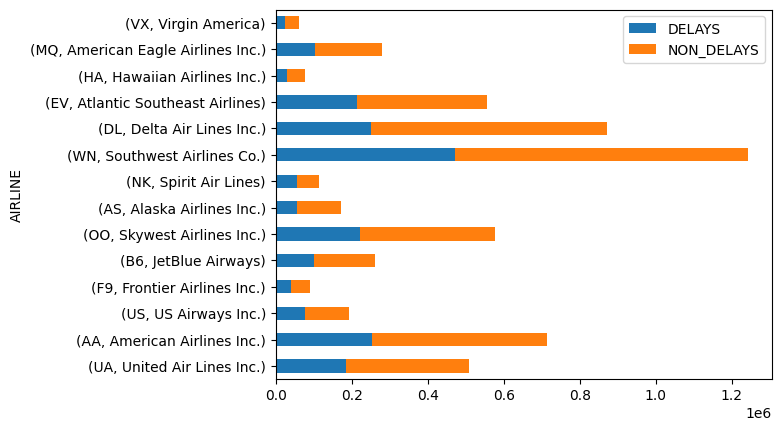

In [49]:
df_perc[['DELAYS', 'NON_DELAYS']].plot.barh(rot=0, stacked=True)

<AxesSubplot: ylabel='AIRLINE'>

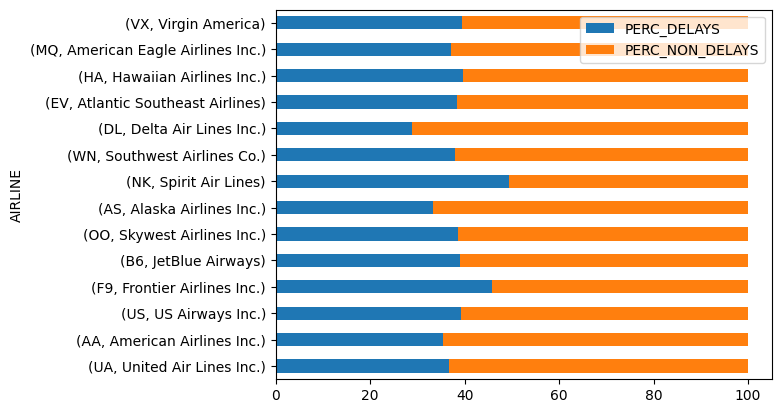

In [51]:
df_perc[['PERC_DELAYS', 'PERC_NON_DELAYS']].plot.barh(rot=0, stacked=True)